# Lab 1: Exploratory Data Analysis (EDA)

**Question:** What is the relationship in relation to the age of the client, whether or not they are subscribed and the amount of times they been contacted?

## Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./bank.csv')

## Brief Initial Data Exploring

### Observation of the Head

In [2]:
# Observe the head
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Observation of the Tail

In [3]:
# Observe the tail 
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


## Examination of Numerical Attributes

### Statistical Summary of Numeric Values

In [4]:
# Print summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


- `age` has (2000-1988) 12 missing values.

### Correlation Matrix

C:\Users\jot_a\AppData\Local\Temp\ipykernel_17680\4095736044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


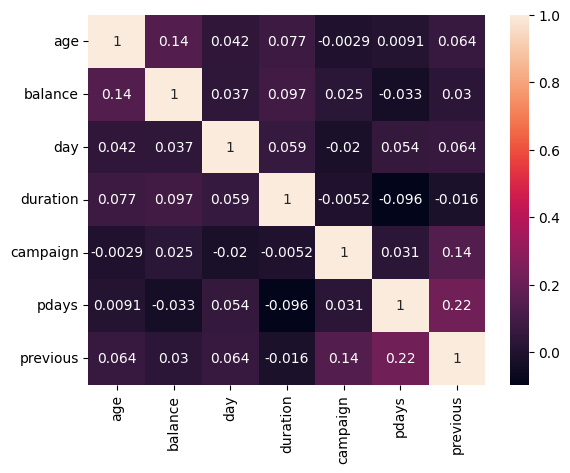

In [16]:
sns.heatmap(df.corr(), annot=True);

The heat map suggests that there is a correlation greater than 0 between `previous` and 4 other attributes, however, `campaign` and `pdays` are the most significant.  

### Pair Plot

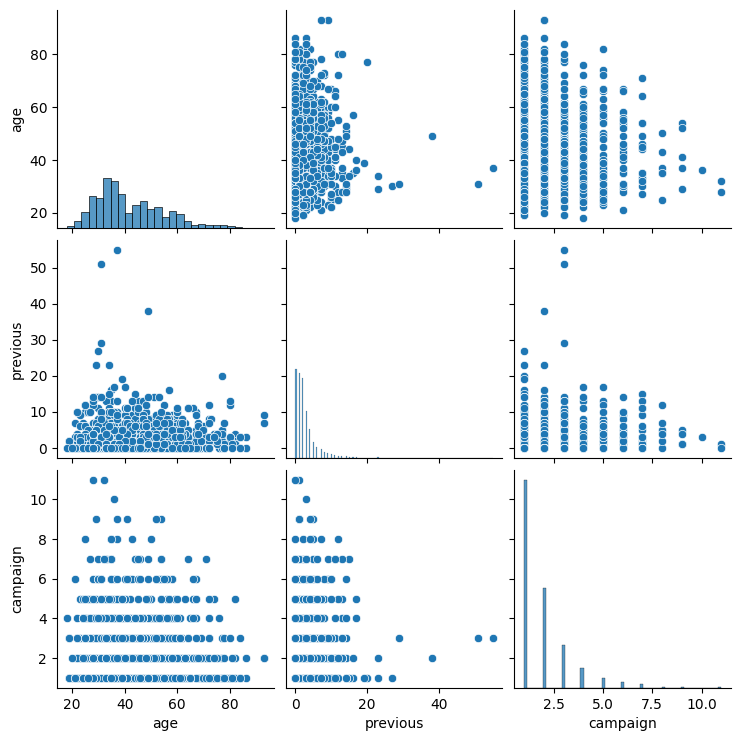

In [27]:
sns.pairplot(data=df[['age','previous','campaign']].dropna())
plt.show()

## Examination of Categorical Attributes

In [7]:
frequency_table = df['poutcome'].value_counts(ascending=True)
print('Frequency Table for Previous Campaign Outcome:') 
print(frequency_table)

Frequency Table for Previous Campaign Outcome:
other      147
success    444
failure    955
Name: poutcome, dtype: int64


In [24]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

In [25]:
df['subscribed'].count()

2000

## Plot Distribution on Numerical Attributes

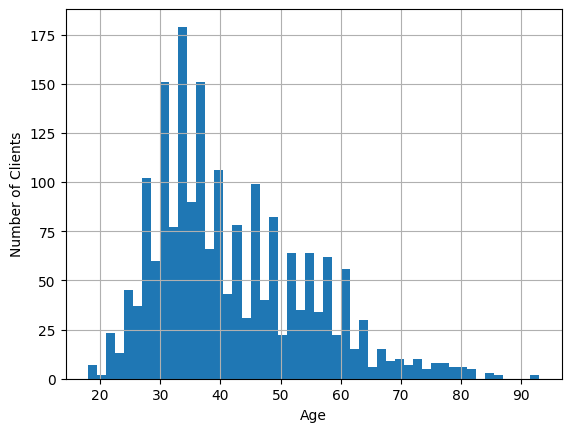

In [10]:
df['age'].hist(bins=50)
plt.xlabel("Age")
plt.ylabel('Number of Clients')
plt.show()

A marjority of the client population are 30+ years old.

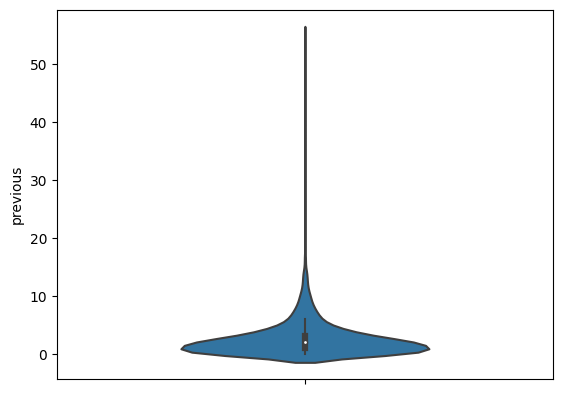

In [11]:
sns.violinplot(y=df['previous'], width=0.5)
plt.show()

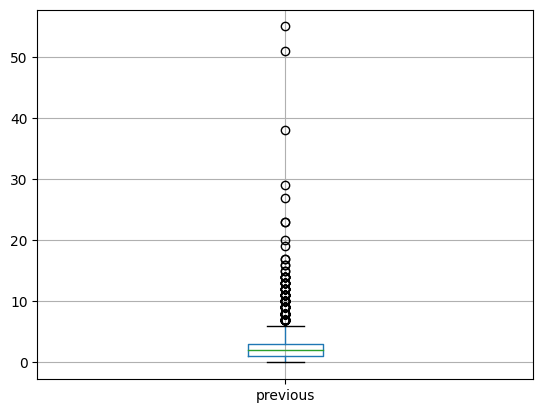

In [12]:
df.boxplot(column='previous')
plt.show()

The average amount of contacts are around 2-3 times, however there are a lot of outliers in this attribute.

## Plots with Combined Distribution of Attributes

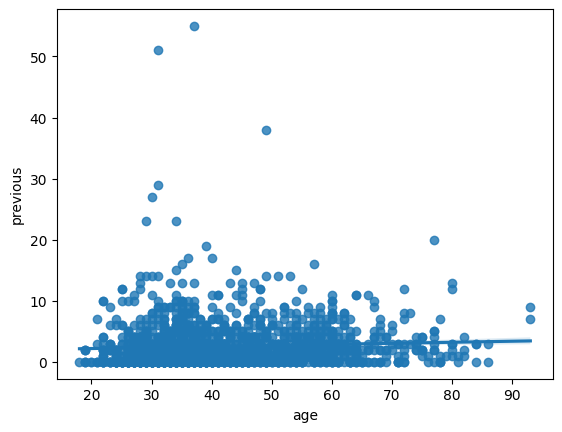

In [26]:
sns.regplot(data=df, x='age', y='previous')
plt.show()

There is an increase in the line of this plot may suggest that the older the client is, the more likely they are to be contacted.

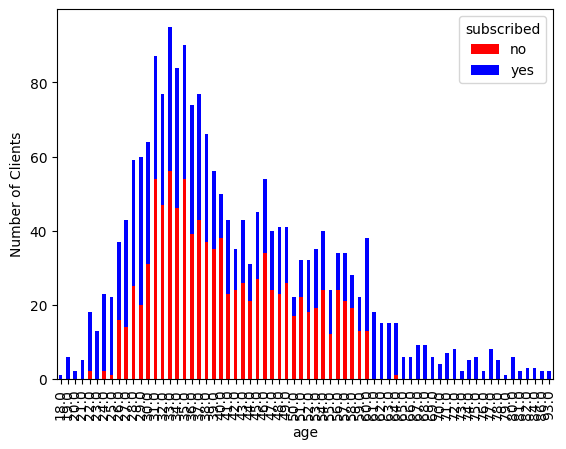

In [23]:
crosstab_CL = pd.crosstab(df['age'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Clients')
plt.show()

Even though, in this dataset, there is an even split between clients who are subscribed and are not; the graph shows that there is a large portion of the client population in the older generation that are subscribed.

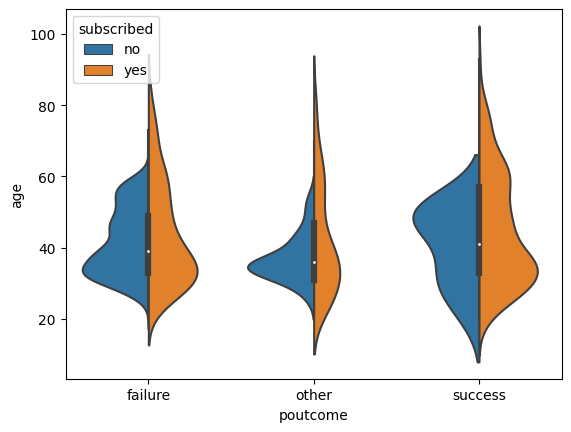

In [21]:
sns.violinplot(data=df, x='poutcome', y='age', hue='subscribed', split=True)
plt.show()

This graph indicates that the older population are the majority of who have subscribed. However, it is interesting that there was an increase of successful outcomes from the previous campaign who are in their 50s that have not subscribed.